<a href="https://colab.research.google.com/github/hemant99108/deep-learning/blob/main/ANN/annUsingKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **implementation of ANN using KERAS**

In [1]:
#importing libraries
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os



In [2]:
os.getcwd()

'/content'

# **checking the CPU AND GPU**

In [3]:
tf.config.list_physical_devices('CPU')


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
check_list=['GPU','CPU']

for device in check_list:
  out=tf.config.list_physical_devices(device)
  if len(out)>0:
    print(f'{device} is availiable ')
    print(f'details:{out}')
  else:
    print(f'{device} is not availiable')



GPU is availiable 
details:[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is availiable 
details:[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


#**create a simple classifier using keras on mnist data**

In [6]:
mnist=tf.keras.datasets.mnist


In [7]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [8]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_test.shape  #every image is in the form of 28 *28 matrix

(10000, 28, 28)

In [11]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [12]:
#create a validation data set from the full training data
#scale the data bw 0 to 1 by dividing it by 255,as its an unsigned data from the range 0-255

X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]


#scale the test set as well
X_test=X_test/255.

In [13]:
#train -55000
#test--10000
#valid---5000

In [14]:
len(X_train_full[5000:])


55000

# **lets view some data**

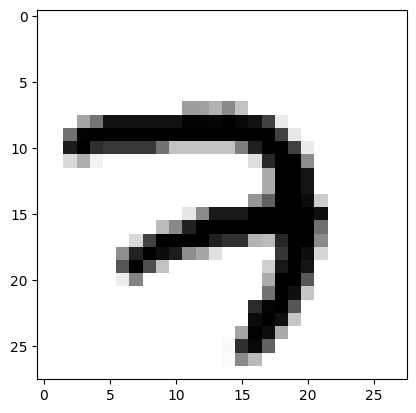

In [15]:
plt.imshow(X_train[0],cmap='binary')
plt.show()


<Axes: >

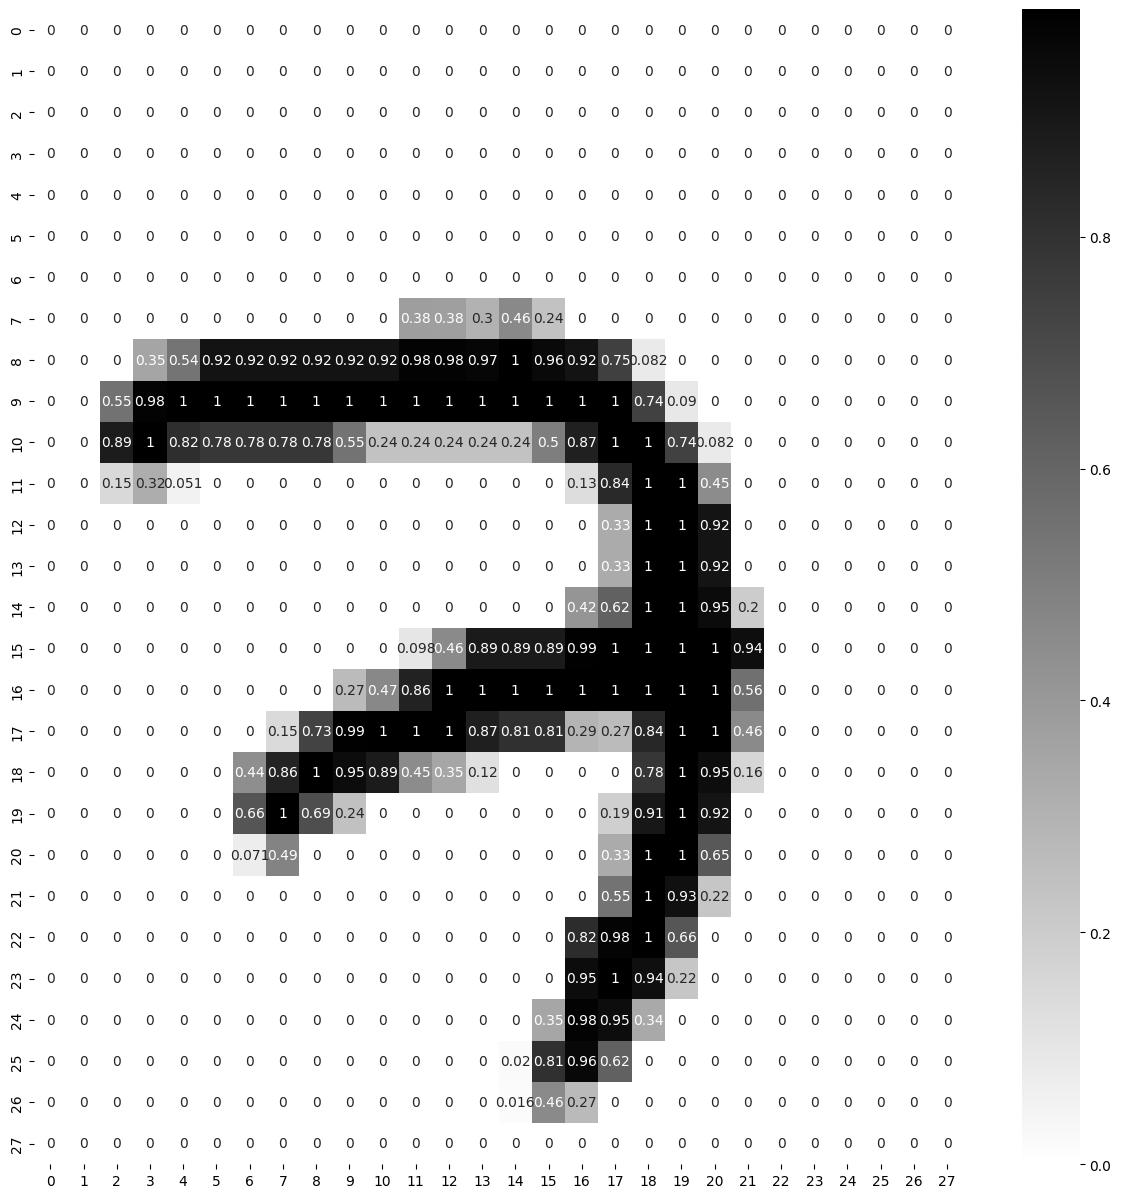

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap='binary')

In [17]:
28*28

784

#**architecture building of the ann with input ,hidden and the output layer**

In [18]:
#creating layers of ANN
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer'),
        tf.keras.layers.Dense(300,activation='relu',name='hiddenLayer1'),
        tf.keras.layers.Dense(100,activation='relu',name='hiddenLayer2'),
        tf.keras.layers.Dense(10,activation='softmax',name='outputLayer')
]


model_clf=tf.keras.models.Sequential(LAYERS)

# ***2nd method to define the model***

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

#define the model
model1=Sequential()
model1.add(Dense(units=64,activation='relu',input_dim=100))
model1.add(Dense(units=10,activation='softmax'))


#compile the model
# model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])


#train the model
# model1.fit(X_train,y_train,epochs=5,batch_size=32)

In [20]:
model_clf.layers


In [21]:
model_clf.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
#first layer*second layer+bias
784*300+300,300*100+100,100*100+10

(235500, 30100, 10010)

In [23]:
#total parameters to be trained
sum((235500, 30100, 10010))

275610

In [24]:
hidden1=model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [25]:
hidden1.get_weights()  #gets both weights and the biases


[array([[ 0.06530222, -0.07092541, -0.04331428, ...,  0.04800151,
         -0.0512233 , -0.05283947],
        [ 0.06280178,  0.04353361,  0.02664468, ..., -0.02493501,
         -0.03867625,  0.0659548 ],
        [ 0.05587731,  0.05354826,  0.00586188, ...,  0.00548854,
          0.04635123,  0.04659415],
        ...,
        [ 0.01721558, -0.03902825,  0.0178327 , ...,  0.01784763,
          0.03331155, -0.03229024],
        [ 0.04084577, -0.03415044, -0.02736248, ..., -0.02968464,
          0.03408368, -0.02789964],
        [ 0.02090646,  0.01970906, -0.03431542, ...,  0.02906299,
         -0.04611844, -0.07021268]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [26]:
weights,biases=hidden1.get_weights()

In [27]:
print('shape\n',biases.shape)
biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
print('weights\n',weights.shape)

weights
 (784, 300)


# **loss function and other things for compilation of model not the fitting**

In [29]:
LOSS_FUNCTION='sparse_categorical_crossentropy'  #use tf.losses.sparse_categorical_crossentropy
OPTIMIZER='SGD'  #or use with custom learning rate -->tf.keras.optimizers.SGD(0.02)
METRICS=['accuracy']

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

# **NOW we can fit the model using train and validation data**

In [30]:
#training the model
EPOCHS=30

VALIDATION_SET=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.5981 - accuracy: 0.8450 - val_loss: 0.2977 - val_accuracy: 0.9166
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2823 - accuracy: 0.9191 - val_loss: 0.2369 - val_accuracy: 0.9324
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2305 - accuracy: 0.9335 - val_loss: 0.1982 - val_accuracy: 0.9440
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1972 - accuracy: 0.9430 - val_loss: 0.1759 - val_accuracy: 0.9496
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1719 - accuracy: 0.9509 - val_loss: 0.1568 - val_accuracy: 0.9554
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1530 - accuracy: 0.9567 - val_loss: 0.1417 - val_accuracy: 0.9602
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1378 - accuracy: 0.9615 - val_loss: 0.1366 - val_accuracy:

In [31]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [32]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.598117,0.844964,0.297730,0.9166
1,0.282255,0.919109,0.236874,0.9324
2,0.230489,0.933527,0.198191,0.9440
3,0.197160,0.943036,0.175887,0.9496
4,0.171936,0.950927,0.156792,0.9554
5,0.153001,0.956691,0.141697,0.9602
6,0.137769,0.961455,0.136611,0.9642
7,0.125620,0.964782,0.124213,0.9636
8,0.114849,0.968218,0.116560,0.9688
9,0.105505,0.970127,0.110487,0.9702


<Axes: >

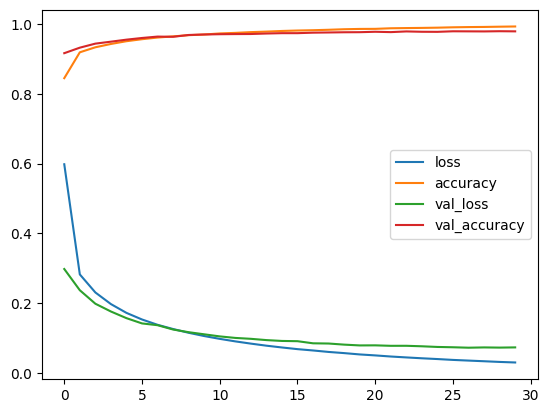

In [33]:
pd.DataFrame(history.history).plot()


# **evaluate the model trained**

In [34]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0725 - accuracy: 0.9771


[0.07245055586099625, 0.9771000146865845]

# **sample check the test data**

In [38]:
x_new=X_test[:3]
# x_new
#take the first 3 elements of the data and we know they are 7 2 1

In [36]:
actual=y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

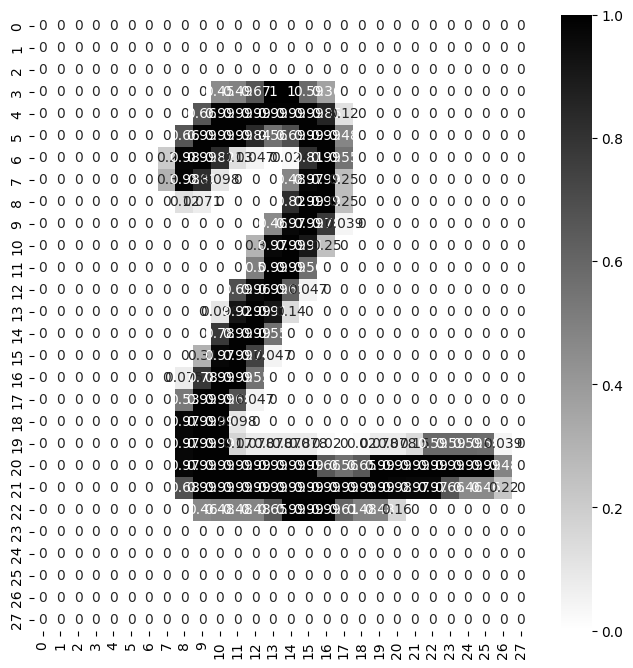

In [39]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[1],annot=True,cmap='binary')

In [41]:
y_prob=model_clf.predict(x_new)
y_prob.round(3)  #giving the probability  of the numbers through index-1

1/1 [==============================] - 0s 71ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.996, 0.   , 0.   , 0.001, 0.   , 0.   , 0.002, 0.001,
        0.   ]], dtype=float32)

In [42]:
#these are actual values without rounding off
y_prob


array([[3.0263075e-07, 7.7215665e-09, 1.8650660e-05, 2.4049183e-04,
        3.5020444e-09, 4.0733692e-08, 8.5087861e-13, 9.9973708e-01,
        4.6497584e-07, 2.9658993e-06],
       [2.8124501e-07, 3.7899867e-05, 9.9986458e-01, 9.4373565e-05,
        3.7050765e-11, 3.1795754e-08, 5.7187810e-07, 1.3822544e-10,
        2.2512854e-06, 1.4283082e-12],
       [1.5908972e-05, 9.9600983e-01, 2.4282487e-04, 1.4737085e-05,
        1.0145275e-03, 4.7319372e-05, 1.4925192e-04, 1.8453359e-03,
        6.4467359e-04, 1.5626476e-05]], dtype=float32)

In [43]:
#searching the obtained results in y-axis
y_pred=np.argmax(y_prob,axis=-1)

In [44]:
y_pred

array([7, 2, 1])

In [45]:
actual

array([7, 2, 1], dtype=uint8)

# **plotting acutal vs predicted**

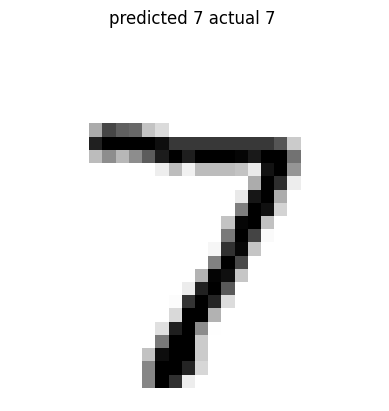

$$$$$$#####


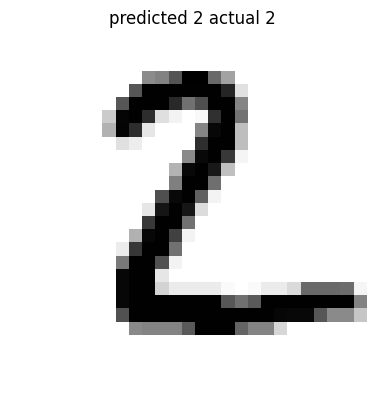

$$$$$$#####


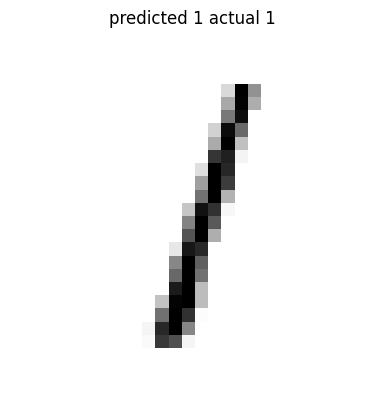

$$$$$$#####


In [46]:
#plot
for data,pred,actual_data in zip(x_new,y_pred,actual):
  plt.imshow(data,cmap='binary')
  plt.title(f'predicted {pred} actual {actual_data} ')
  plt.axis('off')
  plt.show()
  print('$$$$$$#####')